# `Background`
Kinerja supply cahin suatu perusahaan menjadi suatu hal penting yang berkontribusi dalam transformasi proses bisnis. Kondisi perkembangan bisnis yang volatile membuat pelaku bisnis terus mengevaluasi kegiatan usahanya. Perusahaan yang bergerak di bidang online retail shipping ingin melakukan perbaikan kinerja supply chain dalam proses transformasi bisnisnya. Perusahaan ingin meningkatkan efisiensi dan efektivitas dari Mode of Shipment untuk mengurangi biaya dan optimasi bisnis dalam kinerja supply chain.

## `Problem Statement`
Perusahaan ingin mengoptimalkan **efisiensi dan efektivitas dari Mode of Shipment**. Informasi ini akan membantu perusahaan untuk mengurangi biaya dalam proses supply chain, meningkatkan kinerja, dan membantu dalam transformasi proses bisnis.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

Pertanyaan utama
- **Bagaimana karakteristik dari masing-masing mode of shipment untuk efisiensi dan efektivitas kinerja?**

Pertanyaan turunan
- Apakah terdapat perbedaan Revenue antara mode of shipment yang berbeda?
- Bagaimana hubungan antara customer care calls dengan revenue berdasarkan Mode of Shipment?
- Bagaimana karakteristik mode of shipment berdasarkan customer rating?
- Bagaimana karaketristik mode of shipment ditinjau dari prior purchases dan Revenue?
- Bagaimana karakteristik mode pengiriman dilihat dari warehouse block dan kategori berat barang?
- Bagaimana karakteristik mode of shipment terhadap reach on time?

Metrics yang digunakan:
- Revenue


## `Data`
Kita akan menganalisa data yang sudah dikumpulkan oleh perusahaan, untuk menjawab permasalahaan perusahaan.

Dataset ini terdiri dari beberapa informasi terkait komponen bisnis pengirimaan barang. Ada 12 kolom di dalam dataset Online Retail Shipping :  

* ID: ID number of customers
* Warehouse block: The company has a big warehouse that is divided into blocks (A-E)
* Mode of shipment: The company ships the products in multiple ways (Ship, Flight, and Road)
* Customer care calls: The number of calls made from inquiries for inquiries of the shipment
* Customer rating: Rate from each customer. 1 is the lowest, and 5 is the highest
* Cost of the product: Cost of the product in US Dollars
* Prior purchases: The number of previous purchases
* Product importance: The company has categorized the product in various parameters (low, medium, high)
* Gender: Male and female
* Discount offered: Discount offered on that specific product
* Weight in gms: The weight in grams
* Reached on time: 1 indicates that the product has not arrived on time, and 0 indicates the product has arrived on time

## `Setup Init`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import normaltest

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load data

df = pd.read_csv(r'D:\JCDS_2023\Capstone 2\data\raw\Online Retail Shipping.csv')
display(df.head(),df.tail())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


## `Data Understanding and Cleaning`
Tahapan *data understanding* memudahkan kita dalam mengenali dataset secara mendalam, sebelum masuk ke tahap analisis. Proses ini memberi informasi mengenai anomali-anomali apa saja yang terdapat di dalam dataset dan membutuhkan penanganan dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

In [4]:
# Showing information about row and column of dataset

print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (10999, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Insight
- Dataset ini memiliki data dengan jumlah baris sebanyak 10999 dan terdiri dari 12 kolom
- Berdasarkan informasi di atas, kita juga dapat mengetahui tipe data dari masing-masing kolom

In [5]:
# Showing Descriptive Statistic of the dataset

display(df.describe(), df.describe(include='object'))

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


Insight
- Untuk variabel-variabel numerik kita dapat melihat informasi statistika deskriptif yang terdiri dari jumlah, nilai rata-rata, standar deviasi, nilai minimal, nilai maksimal, dan quantile
- Untuk variabel-variabel kategorikal kita mendapatkan informasi terkait jumlah data, nilai unik, dan nilai terbanyak

In [6]:
# Display unique value

pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'neg_value': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

,feature,data_type,null_value,neg_value,n_unique,sample_unique
0,ID,int64,0.0,False,10999,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Warehouse_block,object,0.0,False,5,"[D, F, A, B, C]"
2,Mode_of_Shipment,object,0.0,False,3,"[Flight, Ship, Road]"
3,Customer_care_calls,int64,0.0,False,6,"[4, 2, 3, 5, 6, 7]"
4,Customer_rating,int64,0.0,False,5,"[2, 5, 3, 1, 4]"
5,Cost_of_the_Product,int64,0.0,False,215,"[177, 216, 183, 176, 184, 162, 250, 233, 150, ..."
6,Prior_purchases,int64,0.0,False,8,"[3, 2, 4, 6, 5, 7, 10, 8]"
7,Product_importance,object,0.0,False,3,"[low, medium, high]"
8,Gender,object,0.0,False,2,"[F, M]"
9,Discount_offered,int64,0.0,False,65,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43,..."


Insight
- Dataset tidak memiliki missing value pada masing-masing kolom
- Data yang bernilai negatif tidak ditemukan dalam dataset
- Jumlah nilai unik dan contohnya dapat kita lihat pada informasi di atas

### `Missing Value`

In [7]:
# Percentage of missing value

df.isna().sum()/df.shape[0]*100

ID                     0.0
Warehouse_block        0.0
Mode_of_Shipment       0.0
Customer_care_calls    0.0
Customer_rating        0.0
Cost_of_the_Product    0.0
Prior_purchases        0.0
Product_importance     0.0
Gender                 0.0
Discount_offered       0.0
Weight_in_gms          0.0
Reached.on.Time_Y.N    0.0
dtype: float64

<Axes: >

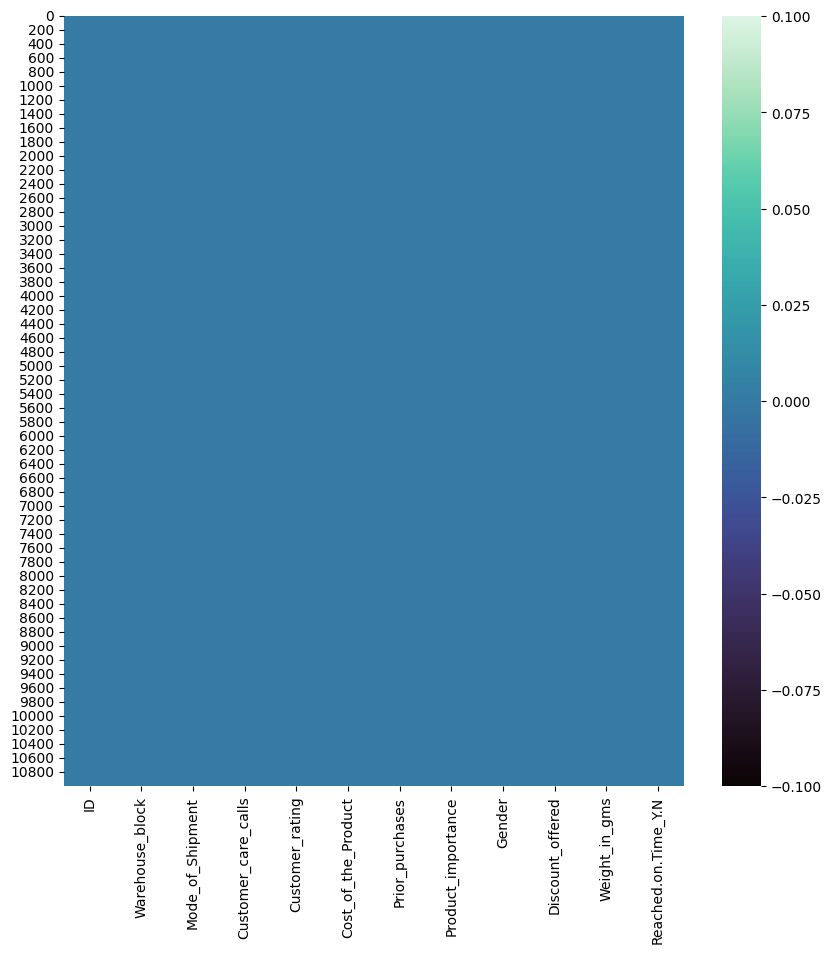

In [8]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df.isna(), cmap='mako')

Insight
- Dataset secara keseluruhan tidak memiliki missing value pada masing-masing kolom
- Tidak ada penanganan khusus pada tahapan ini

### `Duplicated`

In [9]:
# Checking data duplication

print(f'Jumlah data duplikat: {df[df.duplicated()].shape[0]}')
df[df.duplicated()]

Jumlah data duplikat: 0


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


Insight

Tidak ditemukan duplikasi data pada dataset ini

### `Correction`

In [30]:
# Rename the columns

df = df.rename(columns={'Discount_offered' : 'Discount_offered(%)', 'Reached.on.Time_Y.N' : 'Reached_on_Time_(Y/N)'})

In [29]:
# Replace column value

df['Reached_on_Time_(Y/N)'] = df['Reached_on_Time_(Y/N)'].replace([0, 1], ['Y', 'N'])
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered(%),Weight_in_gms,Reached_on_Time_(Y/N)
0,D,Flight,4,2,177,3,low,F,44,1233,N
1,F,Flight,4,5,216,2,low,M,59,3088,N
2,A,Flight,2,2,183,4,low,M,48,3374,N
3,B,Flight,3,3,176,4,medium,M,10,1177,N
4,C,Flight,2,2,184,3,medium,F,46,2484,N


### `Eliminated`

In [12]:
df.drop(columns=['ID'], inplace=True)

Insight

Kolom ID pada dataset tidak diperlukan untuk analisis selanjutnya karena tanpa ID, data dalam baris sudah mewakili karakteristik riwayat data pelanggan  

## `Detecting Outliers`

In [13]:
# Function for searching outliers using IQR Method

def search_outliers (df):
   Q1 = df.quantile(0.25)
   Q3 = df.quantile(0.75)
   IQR = Q3-Q1
   outliers = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
   return outliers

In [14]:
# Customer_care_calls

outliers_Customer_care_calls = search_outliers(df['Customer_care_calls'])

print('number of outliers: ' + str(len(outliers_Customer_care_calls)))

print('max outlier value: ' + str(outliers_Customer_care_calls.max()))

print('min outlier value: '+ str(outliers_Customer_care_calls.min()))

outliers_Customer_care_calls

number of outliers: 0
max outlier value: nan
min outlier value: nan


Series([], Name: Customer_care_calls, dtype: int64)

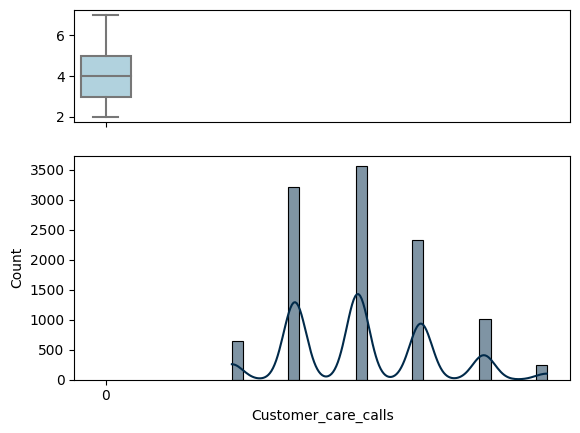

In [15]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (1, 2)})    

sns.boxplot(df['Customer_care_calls'], ax=ax_box, color='#a9d6e5')
sns.histplot(data=df, x='Customer_care_calls', ax=ax_hist, kde=True, color='#012a4a')

plt.show()

In [16]:
kolom = ['Customer_care_calls']

for i in kolom:
    stats, pval = normaltest(df[kolom])
    if pval <= 0.05:
        print(f'Kolom {kolom} tidak berdistribusi normal')
    else:
        print(f'Kolom {kolom} berdistribusi normal')

Kolom ['Customer_care_calls'] tidak berdistribusi normal


In [17]:
# Customer_rating

outliers_Customer_rating = search_outliers (df['Customer_rating'])

print('number of outliers: ' + str(len(outliers_Customer_rating)))

print('max outlier value: ' + str(outliers_Customer_rating.max()))

print('min outlier value: '+ str(outliers_Customer_rating.min()))

outliers_Customer_rating

number of outliers: 0
max outlier value: nan
min outlier value: nan


Series([], Name: Customer_rating, dtype: int64)

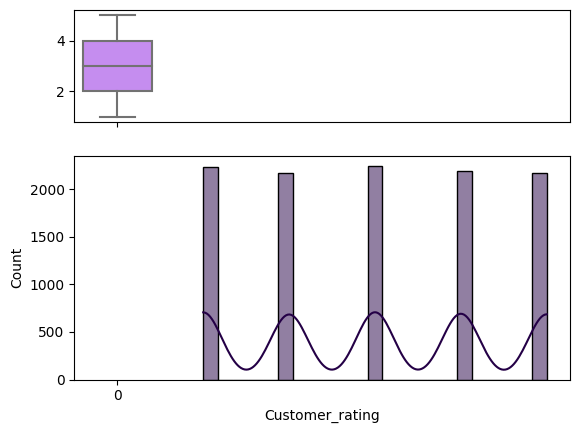

In [18]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (1, 2)})    

sns.boxplot(df['Customer_rating'], ax=ax_box, color='#c77dff')
sns.histplot(data=df, x='Customer_rating', ax=ax_hist, kde=True, color='#240046')

plt.show()

In [19]:
kolom = ['Customer_rating']

for i in kolom:
    stats, pval = normaltest(df[kolom])
    if pval <= 0.05:
        print(f'Kolom {kolom} tidak berdistribusi normal')
    else:
        print(f'Kolom {kolom} berdistribusi normal')

Kolom ['Customer_rating'] tidak berdistribusi normal


In [20]:
# Cost_of_the_Product

outliers_Cost_of_the_Product = search_outliers (df['Cost_of_the_Product'])

print('number of outliers: ' + str(len(outliers_Cost_of_the_Product)))

print('max outlier value: ' + str(outliers_Cost_of_the_Product.max()))

print('min outlier value: '+ str(outliers_Cost_of_the_Product.min()))

outliers_Cost_of_the_Product

number of outliers: 0
max outlier value: nan
min outlier value: nan


Series([], Name: Cost_of_the_Product, dtype: int64)

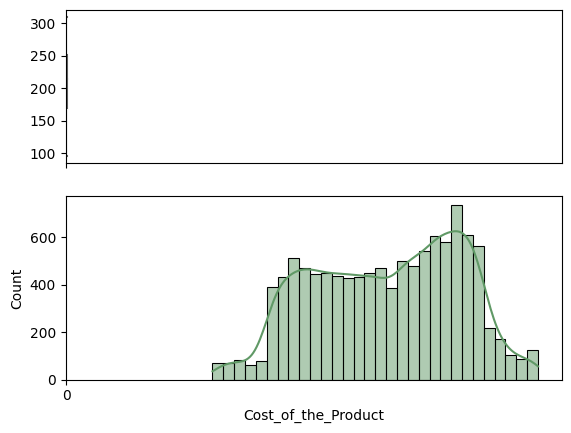

In [21]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (10, 12)})    

sns.boxplot(df['Cost_of_the_Product'], ax=ax_box, color='#9DC08B')
sns.histplot(data=df, x='Cost_of_the_Product', ax=ax_hist, kde=True, color='#609966')

plt.show()

In [22]:
kolom = ['Cost_of_the_Product']

for i in kolom:
    stats, pval = normaltest(df[kolom])
    if pval <= 0.05:
        print(f'Kolom {kolom} tidak berdistribusi normal')
    else:
        print(f'Kolom {kolom} berdistribusi normal')

Kolom ['Cost_of_the_Product'] tidak berdistribusi normal


In [23]:
# Prior_purchases

outliers_Prior_purchases = search_outliers (df['Prior_purchases'])

print('number of outliers: ' + str(len(outliers_Prior_purchases)))

print('max outlier value: ' + str(outliers_Prior_purchases.max()))

print('min outlier value: '+ str(outliers_Prior_purchases.min()))

outliers_Prior_purchases.sample()

number of outliers: 1003
max outlier value: 10
min outlier value: 6


478    8
Name: Prior_purchases, dtype: int64

In [24]:
# Find the precentage of outliers

outliers_Prior_purchases = df['Prior_purchases'].quantile(0.75) + 1.5 * (df['Prior_purchases'].quantile(0.75) - df['Prior_purchases'].quantile(0.25))
Percent_Prior_purchases = df[df['Prior_purchases'] > outliers_Prior_purchases]
Precentage = len(Percent_Prior_purchases)/len(df['Prior_purchases']) * 100 

print(f'Precentage of outliers (%) : {Precentage}')

Precentage of outliers (%) : 9.119010819165378


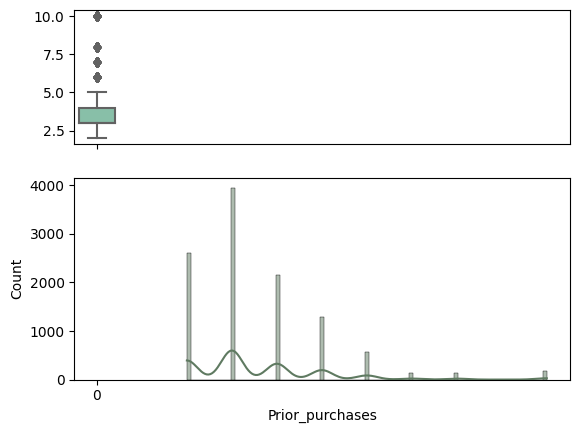

In [25]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (2, 3)})    

sns.boxplot(df['Prior_purchases'], ax=ax_box, color='#7FC8A9')
sns.histplot(data=df, x='Prior_purchases', ax=ax_hist, kde=True, color='#5F7A61')

plt.show()

In [26]:
kolom = ['Prior_purchases']

for i in kolom:
    stats, pval = normaltest(df[kolom])
    if pval <= 0.05:
        print(f'Kolom {kolom} tidak berdistribusi normal')
    else:
        print(f'Kolom {kolom} berdistribusi normal')

Kolom ['Prior_purchases'] tidak berdistribusi normal


In [32]:
# Discount_offered

outliers_Discount_offered = search_outliers (df['Discount_offered(%)'])

print('number of outliers: ' + str(len(outliers_Discount_offered)))

print('max outlier value: ' + str(outliers_Discount_offered.max()))

print('min outlier value: '+ str(outliers_Discount_offered.min()))

outliers_Discount_offered.sample()

number of outliers: 2209
max outlier value: 65
min outlier value: 20


441    45
Name: Discount_offered(%), dtype: int64

In [ ]:
# find the precentage of outliers
DiscountOutliers = df[df['Discount_offered'] > outliers_Discount_offered[0]]
Precentage = len(DiscountOutliers)/len(df.Discount_offered) * 100 

print(f'Precentages of outliers : {Precentage}')

Precentages of outliers : 9.5099554504955


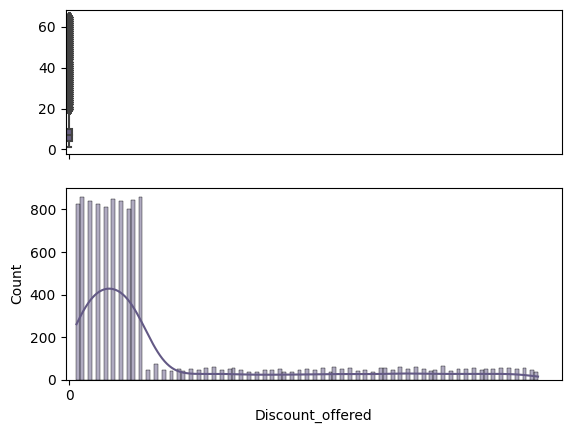

In [ ]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (6, 8)})    

sns.boxplot(df['Discount_offered'], ax=ax_box, color='#635985')
sns.histplot(data=df, x='Discount_offered', ax=ax_hist, kde=True, color='#635985')

plt.show()

In [ ]:
kolom = ['Discount_offered']

for i in kolom:
    stats, pval = normaltest(df[kolom])
    if pval <= 0.05:
        print(f'Kolom {kolom} tidak berdistribusi normal')
    else:
        print(f'Kolom {kolom} berdistribusi normal')

Kolom ['Discount_offered'] tidak berdistribusi normal


In [ ]:
# Weight_in_gms

outliers_Weight_in_gms = search_outliers (df['Weight_in_gms'])

print('number of outliers: ' + str(len(outliers_Weight_in_gms)))

print('max outlier value: ' + str(outliers_Weight_in_gms.max()))

print('min outlier value: '+ str(outliers_Weight_in_gms.min()))

outliers_Weight_in_gms

number of outliers: 0
max outlier value: nan
min outlier value: nan


Series([], Name: Weight_in_gms, dtype: int64)

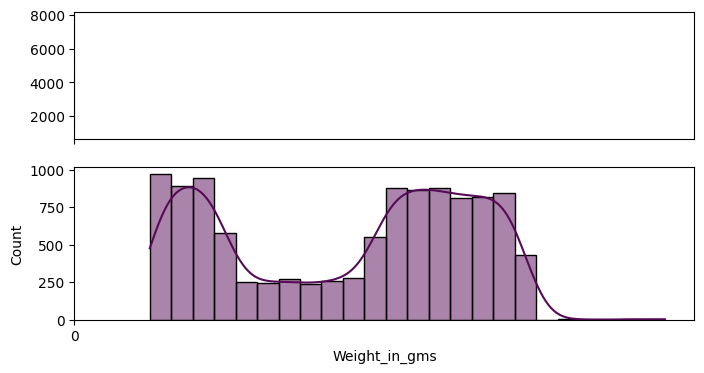

In [ ]:
fig, (ax_box, ax_hist) = plt.subplots(nrows=2, ncols=1, figsize=(8, 4), sharex=True, gridspec_kw={"height_ratios": (10, 12)})    

sns.boxplot(df['Weight_in_gms'], ax=ax_box, color='#570A57')
sns.histplot(data=df, x='Weight_in_gms', ax=ax_hist, kde=True, color='#570A57')

plt.show()

In [ ]:
kolom = ['Weight_in_gms']

for i in kolom:
    stats, pval = normaltest(df[kolom])
    if pval <= 0.05:
        print(f'Kolom {kolom} tidak berdistribusi normal')
    else:
        print(f'Kolom {kolom} berdistribusi normal')

Kolom ['Weight_in_gms'] tidak berdistribusi normal


Insight
- Ada dua kolom yang memilki outliers dengan persentase di atas 5% yaitu kolom Prior_purchases dan Discount_offered, sehingga perlu dilakukan penanganan
- Grafik visual berupa boxplot memudahkan kita melihat keberadaan oultiers dan grafik histogram memberikan kita informasi terkait jenis distribusi pada dataset yang sebagian besar memiliki skewness
- Berdasarkan uji statistik juga diketahui bahwa data tidak berdistribusi normal

## `Handling Outliers`
Outliers ditemukan pada kolom Prior_purchases dan Discount_offered. Penanganan outliers pada kedua kolom akan dibuat ke dalam bentuk interval dengan metode median dan MAD.

Prior_purchases

In [ ]:
# Display the value of Median and MAD

Prior_purchases_Median = df.Prior_purchases.median()
Prior_purchases_MAD = abs(df.Prior_purchases - df.Prior_purchases.median()).median()

Lower = Prior_purchases_Median - Prior_purchases_MAD
Upper = Prior_purchases_Median + Prior_purchases_MAD

print(f'Median : {Prior_purchases_Median}, MAD : {Prior_purchases_MAD}, Lower : {Lower}, Upper : {Upper}')

Median : 3.0, MAD : 1.0, Lower : 2.0, Upper : 4.0


In [33]:
# Prior Purchases Interval

def Prior_purchases_interval (df):
    if 10 > df['Prior_purchases'] > 2:
        return "2 - 4"
    elif df['Prior_purchases'] <= 2:
        return "0 - 2"
    else:
        return "> 4"
    
df['Prior_purchases_interval'] = df.apply(Prior_purchases_interval, axis=1)

# Relocate Prior_purchases_interval next to Prior_purchases
df.insert(df.columns.get_loc('Prior_purchases') + 1, 'Prior_purchases_interval', df.pop('Prior_purchases_interval'))
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Prior_purchases_interval,Product_importance,Gender,Discount_offered(%),Weight_in_gms,Reached_on_Time_(Y/N)
0,D,Flight,4,2,177,3,2 - 4,low,F,44,1233,N
1,F,Flight,4,5,216,2,0 - 2,low,M,59,3088,N
2,A,Flight,2,2,183,4,2 - 4,low,M,48,3374,N
3,B,Flight,3,3,176,4,2 - 4,medium,M,10,1177,N
4,C,Flight,2,2,184,3,2 - 4,medium,F,46,2484,N


Discount_offered

In [ ]:
# Display the value of Median and MAD 

Discount_offered_Median = df.Discount_offered.median()
Discount_offered_MAD = abs(df.Discount_offered - df.Discount_offered.median()).median()

Lower = Discount_offered_Median - Discount_offered_MAD
Upper = Discount_offered_Median + Discount_offered_MAD

print(f'Median : {Discount_offered_Median}, MAD : {Discount_offered_MAD}, Lower : {Lower}, Upper : {Upper}')

Median : 7.0, MAD : 3.0, Lower : 4.0, Upper : 10.0


In [36]:
# Discount Interval

def Discount_interval (df):
    if 10 > df['Discount_offered(%)'] > 4:
        return "4 - 10"
    elif df['Discount_offered(%)'] <= 4:
        return "0 - 4"
    else:
        return "> 10"
    
df['Discount_interval'] = df.apply(Discount_interval, axis=1)

# Relocate Discount_interval column next to Discount_offered
df.insert(df.columns.get_loc('Discount_offered(%)') + 1, 'Discount_interval', df.pop('Discount_interval'))
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Prior_purchases_interval,Product_importance,Gender,Discount_offered(%),Discount_interval,Weight_in_gms,Reached_on_Time_(Y/N)
0,D,Flight,4,2,177,3,2 - 4,low,F,44,> 10,1233,N
1,F,Flight,4,5,216,2,0 - 2,low,M,59,> 10,3088,N
2,A,Flight,2,2,183,4,2 - 4,low,M,48,> 10,3374,N
3,B,Flight,3,3,176,4,2 - 4,medium,M,10,> 10,1177,N
4,C,Flight,2,2,184,3,2 - 4,medium,F,46,> 10,2484,N


Insight

Outliers pada kedua kolom telah ditangani dengan menambahkan interval berdasarkan nilai medaian dan MAD dan hasil proses interval ditambahkan kedalam dataset di samping variabel 

## `Categorizing Variable`

Variabel Weight_in_grams termasuk ke dalam variabel kontinue sehingga bisa dilakukan binnning. Nilai variabel tersebut akan dikelompokan ke dalam kategori tertentu karena memiliki nilai unik yang bervariasi, untuk memudahkan dalam proses analisa data selanjutnya.

In [38]:
# Equal Frequency

weight = KBinsDiscretizer(
    n_bins=3,
    encode='ordinal',
    strategy='kmeans',
)

weight.set_output(transform="pandas")

df['Weight_Category'] = weight.fit_transform(df[['Weight_in_gms']])
df['Weight_Category'] = df['Weight_Category'].replace([0.0, 1.0, 2.0], ['Small', 'Medium', 'Large'])
df['Weight_Category']

0         Small
1        Medium
2        Medium
3         Small
4         Small
          ...  
10994     Small
10995     Small
10996     Small
10997     Small
10998     Small
Name: Weight_Category, Length: 10999, dtype: object

In [39]:
# Relocate 'Weight_Category' beside 'Weight_in_gms'

df.insert(df.columns.get_loc('Weight_in_gms') + 1, 'Weight_Category', df.pop('Weight_Category'))
display(df.head(), df.tail())

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Prior_purchases_interval,Product_importance,Gender,Discount_offered(%),Discount_interval,Weight_in_gms,Weight_Category,Reached_on_Time_(Y/N)
0,D,Flight,4,2,177,3,2 - 4,low,F,44,> 10,1233,Small,N
1,F,Flight,4,5,216,2,0 - 2,low,M,59,> 10,3088,Medium,N
2,A,Flight,2,2,183,4,2 - 4,low,M,48,> 10,3374,Medium,N
3,B,Flight,3,3,176,4,2 - 4,medium,M,10,> 10,1177,Small,N
4,C,Flight,2,2,184,3,2 - 4,medium,F,46,> 10,2484,Small,N


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Prior_purchases_interval,Product_importance,Gender,Discount_offered(%),Discount_interval,Weight_in_gms,Weight_Category,Reached_on_Time_(Y/N)
10994,A,Ship,4,1,252,5,2 - 4,medium,F,1,0 - 4,1538,Small,N
10995,B,Ship,4,1,232,5,2 - 4,medium,F,6,4 - 10,1247,Small,Y
10996,C,Ship,5,4,242,5,2 - 4,low,F,4,0 - 4,1155,Small,Y
10997,F,Ship,5,2,223,6,2 - 4,medium,M,2,0 - 4,1210,Small,Y
10998,D,Ship,2,5,155,5,2 - 4,low,F,6,4 - 10,1639,Small,Y


## `Creating New Attributes`

Atribut lain yang akan dibutuhkan dalam analisis

Pendapatan yang diperoleh (`Revenue`)

    Revenue = Cost - Discount = Cost_of_the_Product - (Cost_of_the_Product * Discount_offered)

In [41]:
# Creating Revenue Metric

df['Revenue'] = df['Cost_of_the_Product'] - (df['Cost_of_the_Product'] * df['Discount_offered(%)'] / 100)

df.insert(df.columns.get_loc('Reached_on_Time_(Y/N)') + 1, 'Revenue', df.pop('Revenue'))
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Prior_purchases_interval,Product_importance,Gender,Discount_offered(%),Discount_interval,Weight_in_gms,Weight_Category,Reached_on_Time_(Y/N),Revenue
0,D,Flight,4,2,177,3,2 - 4,low,F,44,> 10,1233,Small,N,99.12
1,F,Flight,4,5,216,2,0 - 2,low,M,59,> 10,3088,Medium,N,88.56
2,A,Flight,2,2,183,4,2 - 4,low,M,48,> 10,3374,Medium,N,95.16
3,B,Flight,3,3,176,4,2 - 4,medium,M,10,> 10,1177,Small,N,158.40
4,C,Flight,2,2,184,3,2 - 4,medium,F,46,> 10,2484,Small,N,99.36


## `Saving Data`

In [4]:
df.to_csv(f'../data/processed/cleaned_data.csv')